# Perturbative calculation for ZZ coupling
Gengyan Zhang, May 30 2017

In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import string

## References
<a name="Zhu"></a>[1] [Guanyu Zhu, David G. Ferguson, Vladimir E. Manucharyan, and Jens Koch. Circuit QED with fluxonium qubits: Theory of the dispersive regime. Phys. Rev. B 87, 024510.](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.87.024510)

<a name="Johnson"></a>[2] [Blake Johnson. Controlling Photons in Superconducting Electrical Circuits. Yale University, 2011.](http://rsl.yale.edu/sites/default/files/files/RSL_Theses/johnson-thesis.pdf) Section 3.5, pp. 63-65.

## Hamiltonian
![DeviceConcept](./DeviceConcept.png)

The Hamiltonian consists of two qubits (labelled 1, 2) and two couplers (labelled +, -):

$$H = \sum_{i=1,2,\pm}{\left(\omega_i a_i^\dagger a_i - \frac{\alpha_i}{2}a_i^\dagger a_i^\dagger a_i a_i\right)} + \sum_{\substack{i=1,2\\j=\pm}}{g_{ij}(a_i^\dagger a_j + a_i a_j^\dagger)}.$$

We label the states as $|n_1 n_2 n_+ n_-\rangle$. The $ZZ$ coupling rate (assuming couplers are in ground state) is given by

$$\zeta = E_{1100} - E_{1000} - E_{0100}\quad(E_{0000} = 0\text{ for all orders}).$$

## Second order terms
Second order corrections are given by Eqn. (11) in Ref. [[1]](#Zhu):

$$E_{\mathbf{n}l}^{(2)}={\sum_{\mathbf{n}'l'}}'{\frac{_0\langle\mathbf{n}l|V|\mathbf{n}'l'\rangle_{00}\langle\mathbf{n}'l'|V|\mathbf{n}l\rangle_0}{E_{\mathbf{n}l}^{(0)}-E_{\mathbf{n}'l'}^{(0)}}}.$$

|$\mathbf{n}l$|Term|$\mathbf{n}'l'$|Contribution|
|:----:|:----:|:----:|:----:|
|$\left\vert 1000\right\rangle$|1|$\left\vert 0010\right\rangle$|$\dfrac{g_{1+}g_{1+}}{\Delta_{1+}}$|
||2|$\left\vert 0001\right\rangle$|$\dfrac{g_{1-}g_{1-}}{\Delta_{1-}}$|
|$\left\vert 0100\right\rangle$|1|$\left\vert 0010\right\rangle$|$\dfrac{g_{2+}g_{2+}}{\Delta_{2+}}$|
||2|$\left\vert 0001\right\rangle$|$\dfrac{g_{2-}g_{2-}}{\Delta_{2-}}$|
|$\left\vert 1100\right\rangle$|1|$\left\vert 0110\right\rangle$|$\dfrac{g_{1+}g_{1+}}{\Delta_{1+}}$|
||2|$\left\vert 0101\right\rangle$|$\dfrac{g_{1-}g_{1-}}{\Delta_{1-}}$|
||3|$\left\vert 1010\right\rangle$|$\dfrac{g_{2+}g_{2+}}{\Delta_{2+}}$|
||4|$\left\vert 1001\right\rangle$|$\dfrac{g_{2-}g_{2-}}{\Delta_{2-}}$|

So $E_{1100}^{(2)} - E_{1000}^{(2)} - E_{0100}^{(2)} = 0$
and to calculate $\zeta$ we need to go to fourth order.

## Fourth order terms
Fourth order corrections are given by Eqn. (18) in Ref. [[1]](#Zhu):

$$E_\text{N}^{(4)} = {\sum_\text{M,P,Q}}'{\frac{V_\text{NM}V_\text{MP}V_\text{PQ}V_\text{QN}}{E_\text{NM}E_\text{NP}E_\text{NQ}}}-{\sum_\text{M}}'{\frac{|V_\text{NM}|^2}{E_\text{NM}^2}}{\sum_\text{P}}'{\frac{|V_\text{NP}|^2}{E_\text{NP}}},$$

The two types of terms in the above expression are denoted by (I) and (II).

### Type (I) terms
|$\text{N}$|Term|$\text{M}$|$\text{P}$|$\text{Q}$|Contribution|
|:----:|:----:|:----:|:----:|:----:|:----:|
|$\left\vert 1000\right\rangle$|1|$\left\vert 0010\right\rangle$|$\left\vert 0100\right\rangle$|$\left\vert 0010\right\rangle$|$\dfrac{g_{1+}g_{2+}g_{2+}g_{1+}}{\Delta_{1+}\Delta_{12}\Delta_{1+}}$|
||2|$\left\vert 0010\right\rangle$|$\left\vert 0100\right\rangle$|$\left\vert 0001\right\rangle$|$\dfrac{g_{1+}g_{2+}g_{2-}g_{1-}}{\Delta_{1+}\Delta_{12}\Delta_{1-}}$|
||3|$\left\vert 0001\right\rangle$|$\left\vert 0100\right\rangle$|$\left\vert 0010\right\rangle$|$\dfrac{g_{1-}g_{2-}g_{2+}g_{1+}}{\Delta_{1-}\Delta_{12}\Delta_{1+}}$|
||4|$\left\vert 0001\right\rangle$|$\left\vert 0100\right\rangle$|$\left\vert 0001\right\rangle$|$\dfrac{g_{1-}g_{2-}g_{2-}g_{1-}}{\Delta_{1-}\Delta_{12}\Delta_{1-}}$|
|$\left\vert 0100\right\rangle$|1|$\left\vert 0010\right\rangle$|$\left\vert 1000\right\rangle$|$\left\vert 0010\right\rangle$|$\dfrac{g_{2+}g_{1+}g_{1+}g_{2+}}{\Delta_{2+}\Delta_{21}\Delta_{2+}}$|
||2|$\left\vert 0010\right\rangle$|$\left\vert 1000\right\rangle$|$\left\vert 0001\right\rangle$|$\dfrac{g_{2+}g_{1+}g_{1-}g_{2-}}{\Delta_{2+}\Delta_{21}\Delta_{2-}}$|
||3|$\left\vert 0001\right\rangle$|$\left\vert 1000\right\rangle$|$\left\vert 0010\right\rangle$|$\dfrac{g_{2-}g_{1-}g_{1+}g_{2+}}{\Delta_{2-}\Delta_{21}\Delta_{2+}}$|
||4|$\left\vert 0001\right\rangle$|$\left\vert 1000\right\rangle$|$\left\vert 0001\right\rangle$|$\dfrac{g_{2-}g_{1-}g_{1-}g_{2-}}{\Delta_{2-}\Delta_{21}\Delta_{2-}}$|
|$\left\vert 1100\right\rangle$|1|$\left\vert 0110\right\rangle$|$\left\vert 0020\right\rangle$|$\left\vert 1010\right\rangle$|$\dfrac{2g_{1+}g_{2+}g_{1+}g_{2+}}{\Delta_{1+}(\Delta_{1+}+\Delta_{2+}+\alpha_{+})\Delta_{2+}}$|
||2|$\left\vert 0110\right\rangle$|$\left\vert 0020\right\rangle$|$\left\vert 0110\right\rangle$|$\dfrac{2g_{1+}g_{2+}g_{2+}g_{1+}}{\Delta_{1+}(\Delta_{1+}+\Delta_{2+}+\alpha_{+})\Delta_{1+}}$|
||3|$\left\vert 0110\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 1001\right\rangle$|$\dfrac{g_{1+}g_{2-}g_{1+}g_{2-}}{\Delta_{1+}(\Delta_{1+}+\Delta_{2-})\Delta_{2-}}$|
||4|$\left\vert 0110\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 0101\right\rangle$|$\dfrac{g_{1+}g_{2-}g_{2+}g_{1-}}{\Delta_{1+}(\Delta_{1+}+\Delta_{2-})\Delta_{1-}}$|
||5|$\left\vert 0110\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 1010\right\rangle$|$\dfrac{g_{1+}g_{2-}g_{1-}g_{2+}}{\Delta_{1+}(\Delta_{1+}+\Delta_{2-})\Delta_{2+}}$|
||6|$\left\vert 0110\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 0110\right\rangle$|$\dfrac{g_{1+}g_{2-}g_{2-}g_{1+}}{\Delta_{1+}(\Delta_{1+}+\Delta_{2-})\Delta_{1+}}$|
||7|$\left\vert 0110\right\rangle$|$\left\vert 0200\right\rangle$|$\left\vert 0110\right\rangle$|$\dfrac{2g_{1+}g_{2+}g_{2+}g_{1+}}{\Delta_{1+}(\Delta_{12}+\alpha_{2})\Delta_{1+}}$|
||8|$\left\vert 0110\right\rangle$|$\left\vert 0200\right\rangle$|$\left\vert 0101\right\rangle$|$\dfrac{2g_{1+}g_{2+}g_{2-}g_{1-}}{\Delta_{1+}(\Delta_{12}+\alpha_{2})\Delta_{1-}}$|
||9|$\left\vert 0101\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 1001\right\rangle$|$\dfrac{g_{1-}g_{2+}g_{1+}g_{2-}}{\Delta_{1-}(\Delta_{1+}+\Delta_{2-})\Delta_{2-}}$|
||10|$\left\vert 0101\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 0101\right\rangle$|$\dfrac{g_{1-}g_{2+}g_{2+}g_{1-}}{\Delta_{1-}(\Delta_{1+}+\Delta_{2-})\Delta_{1-}}$|
||11|$\left\vert 0101\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 1010\right\rangle$|$\dfrac{g_{1-}g_{2+}g_{1-}g_{2+}}{\Delta_{1-}(\Delta_{1+}+\Delta_{2-})\Delta_{2+}}$|
||12|$\left\vert 0101\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 0110\right\rangle$|$\dfrac{g_{1-}g_{2+}g_{2-}g_{1+}}{\Delta_{1-}(\Delta_{1+}+\Delta_{2-})\Delta_{1+}}$|
||13|$\left\vert 0101\right\rangle$|$\left\vert 0002\right\rangle$|$\left\vert 1001\right\rangle$|$\dfrac{2g_{1-}g_{2-}g_{1-}g_{2-}}{\Delta_{1-}(\Delta_{1-}+\Delta_{2-}+\alpha_{-})\Delta_{2-}}$|
||14|$\left\vert 0101\right\rangle$|$\left\vert 0002\right\rangle$|$\left\vert 0101\right\rangle$|$\dfrac{2g_{1-}g_{2-}g_{2-}g_{1-}}{\Delta_{1-}(\Delta_{1-}+\Delta_{2-}+\alpha_{-})\Delta_{1-}}$|
||15|$\left\vert 0101\right\rangle$|$\left\vert 0200\right\rangle$|$\left\vert 0110\right\rangle$|$\dfrac{2g_{1-}g_{2-}g_{2+}g_{1+}}{\Delta_{1-}(\Delta_{12}+\alpha_{2})\Delta_{1+}}$|
||16|$\left\vert 0101\right\rangle$|$\left\vert 0200\right\rangle$|$\left\vert 0101\right\rangle$|$\dfrac{2g_{1-}g_{2-}g_{2-}g_{1-}}{\Delta_{1-}(\Delta_{12}+\alpha_{2})\Delta_{1-}}$|
||17|$\left\vert 1010\right\rangle$|$\left\vert 0020\right\rangle$|$\left\vert 1010\right\rangle$|$\dfrac{2g_{2+}g_{1+}g_{1+}g_{2+}}{\Delta_{2+}(\Delta_{1+}+\Delta_{2+}+\alpha_{+})\Delta_{2+}}$|
||18|$\left\vert 1010\right\rangle$|$\left\vert 0020\right\rangle$|$\left\vert 0110\right\rangle$|$\dfrac{2g_{2+}g_{1+}g_{2+}g_{1+}}{\Delta_{2+}(\Delta_{1+}+\Delta_{2+}+\alpha_{+})\Delta_{1+}}$|
||19|$\left\vert 1010\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 1001\right\rangle$|$\dfrac{g_{2+}g_{1-}g_{1+}g_{2-}}{\Delta_{2+}(\Delta_{1+}+\Delta_{2-})\Delta_{2-}}$|
||20|$\left\vert 1010\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 0101\right\rangle$|$\dfrac{g_{2+}g_{1-}g_{2+}g_{1-}}{\Delta_{2+}(\Delta_{1+}+\Delta_{2-})\Delta_{1-}}$|
||21|$\left\vert 1010\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 1010\right\rangle$|$\dfrac{g_{2+}g_{1-}g_{1-}g_{2+}}{\Delta_{2+}(\Delta_{1+}+\Delta_{2-})\Delta_{2+}}$|
||22|$\left\vert 1010\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 0110\right\rangle$|$\dfrac{g_{2+}g_{1-}g_{2-}g_{1+}}{\Delta_{2+}(\Delta_{1+}+\Delta_{2-})\Delta_{1+}}$|
||23|$\left\vert 1010\right\rangle$|$\left\vert 2000\right\rangle$|$\left\vert 1010\right\rangle$|$\dfrac{2g_{2+}g_{1+}g_{1+}g_{2+}}{\Delta_{2+}(\Delta_{21}+\alpha_{1})\Delta_{2+}}$|
||24|$\left\vert 1010\right\rangle$|$\left\vert 2000\right\rangle$|$\left\vert 1001\right\rangle$|$\dfrac{2g_{2+}g_{1+}g_{1-}g_{2-}}{\Delta_{2+}(\Delta_{21}+\alpha_{1})\Delta_{2-}}$|
||25|$\left\vert 1001\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 1001\right\rangle$|$\dfrac{g_{2-}g_{1+}g_{1+}g_{2-}}{\Delta_{2-}(\Delta_{1+}+\Delta_{2-})\Delta_{2-}}$|
||26|$\left\vert 1001\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 0101\right\rangle$|$\dfrac{g_{2-}g_{1+}g_{2+}g_{1-}}{\Delta_{2-}(\Delta_{1+}+\Delta_{2-})\Delta_{1-}}$|
||27|$\left\vert 1001\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 1010\right\rangle$|$\dfrac{g_{2-}g_{1+}g_{1-}g_{2+}}{\Delta_{2-}(\Delta_{1+}+\Delta_{2-})\Delta_{2+}}$|
||28|$\left\vert 1001\right\rangle$|$\left\vert 0011\right\rangle$|$\left\vert 0110\right\rangle$|$\dfrac{g_{2-}g_{1+}g_{2-}g_{1+}}{\Delta_{2-}(\Delta_{1+}+\Delta_{2-})\Delta_{1+}}$|
||29|$\left\vert 1001\right\rangle$|$\left\vert 0002\right\rangle$|$\left\vert 1001\right\rangle$|$\dfrac{2g_{2-}g_{1-}g_{1-}g_{2-}}{\Delta_{2-}(\Delta_{1-}+\Delta_{2-}+\alpha_{-})\Delta_{2-}}$|
||30|$\left\vert 1001\right\rangle$|$\left\vert 0002\right\rangle$|$\left\vert 0101\right\rangle$|$\dfrac{2g_{2-}g_{1-}g_{2-}g_{1-}}{\Delta_{2-}(\Delta_{1-}+\Delta_{2-}+\alpha_{-})\Delta_{1-}}$|
||31|$\left\vert 1001\right\rangle$|$\left\vert 2000\right\rangle$|$\left\vert 1010\right\rangle$|$\dfrac{2g_{2-}g_{1-}g_{1+}g_{2+}}{\Delta_{2-}(\Delta_{21}+\alpha_{1})\Delta_{2+}}$|
||32|$\left\vert 1001\right\rangle$|$\left\vert 2000\right\rangle$|$\left\vert 1001\right\rangle$|$\dfrac{2g_{2-}g_{1-}g_{1-}g_{2-}}{\Delta_{2-}(\Delta_{21}+\alpha_{1})\Delta_{2-}}$|

### Type (II) terms
|$\text{N}$|Term|$\text{M}$|$\text{P}$|Contribution|
|:----:|:----:|:----:|:----:|:----:|
|$\left\vert 1000\right\rangle$|1|$\left\vert 0010\right\rangle$|$\left\vert 0010\right\rangle$|$-\dfrac{g_{1+}g_{1+}}{\Delta_{1+}^2\Delta_{1+}}$|
||2|$\left\vert 0010\right\rangle$|$\left\vert 0001\right\rangle$|$-\dfrac{g_{1+}g_{1-}}{\Delta_{1+}^2\Delta_{1-}}$|
||3|$\left\vert 0001\right\rangle$|$\left\vert 0010\right\rangle$|$-\dfrac{g_{1-}g_{1+}}{\Delta_{1-}^2\Delta_{1+}}$|
||4|$\left\vert 0001\right\rangle$|$\left\vert 0001\right\rangle$|$-\dfrac{g_{1-}g_{1-}}{\Delta_{1-}^2\Delta_{1-}}$|
|$\left\vert 0100\right\rangle$|1|$\left\vert 0010\right\rangle$|$\left\vert 0010\right\rangle$|$-\dfrac{g_{2+}g_{2+}}{\Delta_{2+}^2\Delta_{2+}}$|
||2|$\left\vert 0010\right\rangle$|$\left\vert 0001\right\rangle$|$-\dfrac{g_{2+}g_{2-}}{\Delta_{2+}^2\Delta_{2-}}$|
||3|$\left\vert 0001\right\rangle$|$\left\vert 0010\right\rangle$|$-\dfrac{g_{2-}g_{2+}}{\Delta_{2-}^2\Delta_{2+}}$|
||4|$\left\vert 0001\right\rangle$|$\left\vert 0001\right\rangle$|$-\dfrac{g_{2-}g_{2-}}{\Delta_{2-}^2\Delta_{2-}}$|
|$\left\vert 1100\right\rangle$|1|$\left\vert 0110\right\rangle$|$\left\vert 0110\right\rangle$|$-\dfrac{g_{1+}g_{1+}}{\Delta_{1+}^2\Delta_{1+}}$|
||2|$\left\vert 0110\right\rangle$|$\left\vert 0101\right\rangle$|$-\dfrac{g_{1+}g_{1-}}{\Delta_{1+}^2\Delta_{1-}}$|
||3|$\left\vert 0110\right\rangle$|$\left\vert 1010\right\rangle$|$-\dfrac{g_{1+}g_{2+}}{\Delta_{1+}^2\Delta_{2+}}$|
||4|$\left\vert 0110\right\rangle$|$\left\vert 1001\right\rangle$|$-\dfrac{g_{1+}g_{2-}}{\Delta_{1+}^2\Delta_{2-}}$|
||5|$\left\vert 0101\right\rangle$|$\left\vert 0110\right\rangle$|$-\dfrac{g_{1-}g_{1+}}{\Delta_{1-}^2\Delta_{1+}}$|
||6|$\left\vert 0101\right\rangle$|$\left\vert 0101\right\rangle$|$-\dfrac{g_{1-}g_{1-}}{\Delta_{1-}^2\Delta_{1-}}$|
||7|$\left\vert 0101\right\rangle$|$\left\vert 1010\right\rangle$|$-\dfrac{g_{1-}g_{2+}}{\Delta_{1-}^2\Delta_{2+}}$|
||8|$\left\vert 0101\right\rangle$|$\left\vert 1001\right\rangle$|$-\dfrac{g_{1-}g_{2-}}{\Delta_{1-}^2\Delta_{2-}}$|
||9|$\left\vert 1010\right\rangle$|$\left\vert 0110\right\rangle$|$-\dfrac{g_{2+}g_{1+}}{\Delta_{2+}^2\Delta_{1+}}$|
||10|$\left\vert 1010\right\rangle$|$\left\vert 0101\right\rangle$|$-\dfrac{g_{2+}g_{1-}}{\Delta_{2+}^2\Delta_{1-}}$|
||11|$\left\vert 1010\right\rangle$|$\left\vert 1010\right\rangle$|$-\dfrac{g_{2+}g_{2+}}{\Delta_{2+}^2\Delta_{2+}}$|
||12|$\left\vert 1010\right\rangle$|$\left\vert 1001\right\rangle$|$-\dfrac{g_{2+}g_{2-}}{\Delta_{2+}^2\Delta_{2-}}$|
||13|$\left\vert 1001\right\rangle$|$\left\vert 0110\right\rangle$|$-\dfrac{g_{2-}g_{1+}}{\Delta_{2-}^2\Delta_{1+}}$|
||14|$\left\vert 1001\right\rangle$|$\left\vert 0101\right\rangle$|$-\dfrac{g_{2-}g_{1-}}{\Delta_{2-}^2\Delta_{1-}}$|
||15|$\left\vert 1001\right\rangle$|$\left\vert 1010\right\rangle$|$-\dfrac{g_{2-}g_{2+}}{\Delta_{2-}^2\Delta_{2+}}$|
||16|$\left\vert 1001\right\rangle$|$\left\vert 1001\right\rangle$|$-\dfrac{g_{2-}g_{2-}}{\Delta_{2-}^2\Delta_{2-}}$|

## Final result
The final result for $\zeta$ is

\begin{align}
\zeta&=E_{1100}^{(4)} - E_{1000}^{(4)} - E_{0100}^{(4)}\\
&=\frac{2 g_{1+}^2 g_{2+}^2}{\Delta_{1+}+\Delta_{2+}+\alpha_+}\left(\frac{1}{\Delta_{1+}}+\frac{1}{\Delta_{2+}}\right)^2 + \frac{2 g_{1-}^2 g_{2-}^2}{\Delta_{1-}+\Delta_{2-}+\alpha_-}\left(\frac{1}{\Delta_{1-}}+\frac{1}{\Delta_{2-}}\right)^2\\
&\quad +\left(\frac{g_{1+}g_{2+}}{\Delta_{1+}}+\frac{g_{1-}g_{2-}}{\Delta_{1-}}\right)^2\left(\frac{2}{\Delta_{12}+\alpha_2}-\frac{1}{\Delta_{12}}\right)\\
&\quad +\left(\frac{g_{1+}g_{2+}}{\Delta_{2+}}+\frac{g_{1-}g_{2-}}{\Delta_{2-}}\right)^2\left(\frac{2}
{\Delta_{21}+\alpha_1}-\frac{1}{\Delta_{21}}\right)\\
&\quad + \left[g_{1+}g_{2-}\left(\frac{1}{\Delta_{1+}}+\frac{1}{\Delta_{2-}}\right)+g_{1-}g_{2+}\left(\frac{1}{\Delta_{1-}}+\frac{1}{\Delta_{2+}}\right)\right]^2\frac{1}{\Delta_{1+}+\Delta_{2-}}\\
&\quad - \left(\frac{g_{1+}^2}{\Delta_{1+}^2}+\frac{g_{1-}^2}{\Delta_{1-}^2}\right)\left(\frac{g_{2+}^2}{\Delta_{2+}}+\frac{g_{2-}^2}{\Delta_{2-}}\right) - \left(\frac{g_{2+}^2}{\Delta_{2+}^2}+\frac{g_{2-}^2}{\Delta_{2-}^2}\right)\left(\frac{g_{1+}^2}{\Delta_{1+}}+\frac{g_{1-}^2}{\Delta_{1-}}\right).
\end{align}

## Comparison with numerical diagonalization

We consider and compare four different parameter sets.

1\. Qubits in straddling regime, one coupler above, one coupler below.

   $\quad\alpha_{1} = \alpha_{2} = 350$ MHz, $\alpha_- = 750$ MHz, $\alpha_+ = 0$,  
   $\quad\Delta_{12} = 250$ MHz, $\Delta_{+2} = 1800$ MHz,  
   $\quad g_{1+} = g_{2+} = 160$ MHz, $g_{1-} = g_{2-} = 140$ MHz.

2\. Qubits far apart, one coupler in between.

   $\quad\alpha_{1} = \alpha_{2} = 350$ MHz, $\alpha_c = 750$ MHz,  
   $\quad\Delta_{12} = 1500$ MHz, $g_{1c} = g_{2c} = 140$ MHz.
   
3\. Qubits in straddling regime, one coupler above.

  $\quad\alpha_{1} = \alpha_{2} = 350$ MHz, $\alpha_c = 750$ MHz,  
  $\quad\Delta_{12} = 250$ MHz, $g_{1c} = g_{2c} = 120$ MHz.
  
4\. Qubits out of straddling regime, one coupler above, one coupler below.

  $\quad\alpha_{1} = \alpha_{2} = 350$ MHz, $\alpha_- = 750$ MHz, $\alpha_+ = 0$,  
   $\quad\Delta_{12} = 450$ MHz, $\Delta_{+2} = 1800$ MHz,  
   $\quad g_{1+} = g_{2+} = 160$ MHz, $g_{1-} = g_{2-} = 140$ MHz.

In [2]:
# Operators
Nmax = 4
a1 = qt.tensor(qt.destroy(Nmax), qt.qeye(Nmax), qt.qeye(Nmax), qt.qeye(Nmax))
a1dag = a1.dag()

a2 = qt.tensor(qt.qeye(Nmax), qt.destroy(Nmax), qt.qeye(Nmax), qt.qeye(Nmax))
a2dag = a2.dag()

ap = qt.tensor(qt.qeye(Nmax), qt.qeye(Nmax), qt.destroy(Nmax), qt.qeye(Nmax))
apdag = ap.dag()

am = qt.tensor(qt.qeye(Nmax), qt.qeye(Nmax), qt.qeye(Nmax), qt.destroy(Nmax))
amdag = am.dag()

# Anharmonicity
alpha1 = 350*2*np.pi
alpha2 = 350*2*np.pi
alpham = 750*2*np.pi
alphap = 0*2*np.pi


# Function to compute zeta for specified parameters
def computeZeta(deltam2, delta12, deltap2, g1p, g2p, g1m, g2m):
    # Hamiltonian in rotating frame of qubit 2
    H = (delta12*a1dag*a1 + deltap2*apdag*ap + deltam2*amdag*am -
         0.5*alpha1*a1dag*a1dag*a1*a1 - 0.5*alpha2*a2dag*a2dag*a2*a2 -
         0.5*alpham*amdag*amdag*am*am - 0.5*alphap*apdag*apdag*ap*ap +
         g1p*(a1dag*ap + a1*apdag) + g2p*(a2dag*ap + a2*apdag) +
         g1m*(a1dag*am + a1*amdag) + g2m*(a2dag*am + a2*amdag))
    # Calculate eigenvalues and eigenvectors
    eigvals, eigvecs = H.eigenstates()
    # Find the dressed states that are closest to states |0000>, |1000>, |0100>, |1100>
    psivec = [qt.tensor(qt.basis(Nmax, 0), qt.basis(Nmax, 0),
                        qt.basis(Nmax, 0), qt.basis(Nmax, 0)),
              qt.tensor(qt.basis(Nmax, 1), qt.basis(Nmax, 0),
                        qt.basis(Nmax, 0), qt.basis(Nmax, 0)),
              qt.tensor(qt.basis(Nmax, 0), qt.basis(Nmax, 1),
                        qt.basis(Nmax, 0), qt.basis(Nmax, 0)),
              qt.tensor(qt.basis(Nmax, 1), qt.basis(Nmax, 1),
                        qt.basis(Nmax, 0), qt.basis(Nmax, 0))]
    # Find the corresponding dressed frequencies
    omega = []
    for psi in psivec:
        index = np.argmax([qt.expect(psi*psi.dag(), x) for x in eigvecs])
        omega.append(eigvals[index])
    # Calculate and return zeta
    return (omega[3] - omega[2]) - (omega[1] - omega[0])

Calculating sub-figure 1 ...
Calculating sub-figure 2 ...
Calculating sub-figure 3 ...
Calculating sub-figure 4 ...


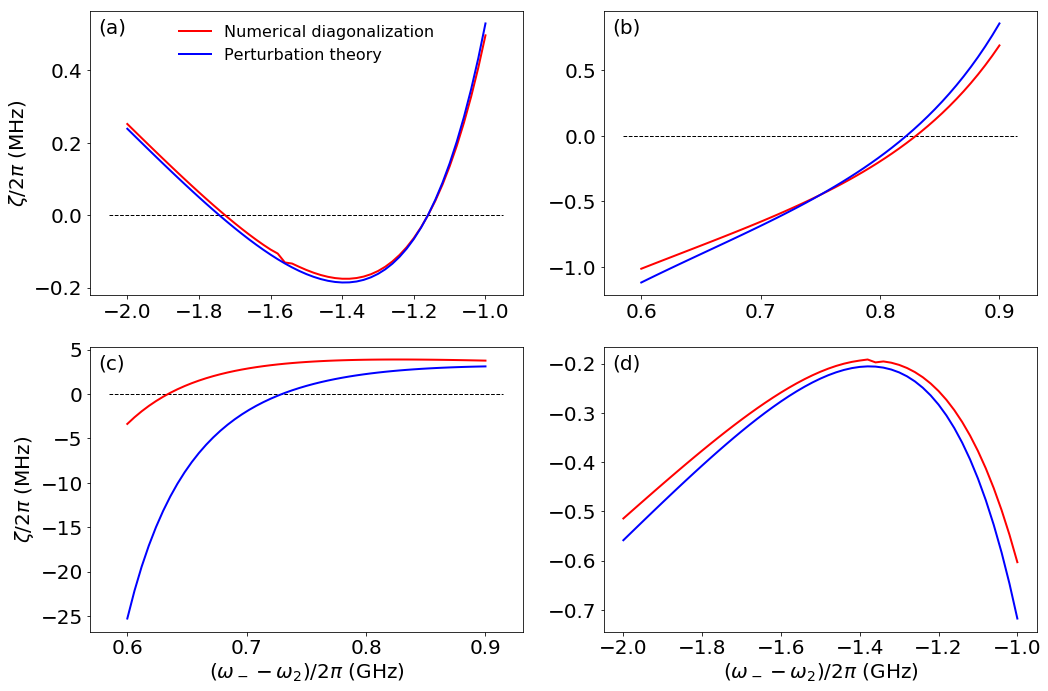

In [3]:
# Detuning between qubits
delta12 = np.array([250, 1500, 250, 450])*2*np.pi
# Detuning between upper coupler and qubit 2
deltap2 = np.array([1800, 1800, 1800, 1800])*2*np.pi
# Coupling rate between qubits and couplers
g1p = np.array([160, 0, 0, 160])*2*np.pi
g2p = np.array([160, 0, 0, 160])*2*np.pi
g1m = np.array([140, 140, 120, 140])*2*np.pi
g2m = np.array([140, 140, 120, 140])*2*np.pi

# Sweep Deltam2
deltaList = [np.linspace(-2000, -1000, 51)*2*np.pi,
             np.linspace(600, 900, 51)*2*np.pi,
             np.linspace(600, 900, 51)*2*np.pi,
             np.linspace(-2000, -1000, 51)*2*np.pi]
# Set up plots
plt.rc('font', size=20)
plt.rc('lines', linewidth=2)
plt.figure(1, figsize=(15, 10))
axes = []
# Calculate zeta for the four parameter sets
for ii, params in enumerate(zip(deltaList, delta12, deltap2, g1p, g2p, g1m, g2m)):
    deltam2 = params[0]
    print('Calculating sub-figure {:d} ...'.format(ii+1))
    # Numerical diagonalization, using parallel_map to accelerate
    zetaNum = np.array(qt.parallel_map(computeZeta, deltam2, task_args=params[1:]))

    # Unpack parameters
    delta12 = params[1]
    delta1p = params[1] - params[2]
    delta2p = -params[2]
    g1p = params[3]
    g2p = params[4]
    g1m = params[5]
    g2m = params[6]
    zeta1 = np.zeros(deltam2.shape)
    zeta2 = np.zeros(deltam2.shape)
    zeta3 = np.zeros(deltam2.shape)
    zeta4 = np.zeros(deltam2.shape)
    zeta5 = np.zeros(deltam2.shape)
    zeta6 = np.zeros(deltam2.shape)
    # Calculate zeta using expression from perturbation theory
    for jj, delta in enumerate(deltam2):
        delta1m = delta12 - delta
        delta2m = -delta
        # Calculate each term in the expression of zeta
        zeta1[jj] = (2*g1p**2*g2p**2/(delta1p+delta2p+alphap) *
                    (1/delta1p+1/delta2p)**2)
        zeta2[jj] = (2*g1m**2*g2m**2/(delta1m+delta2m+alpham) *
                    (1/delta1m+1/delta2m)**2)
        zeta3[jj] = ((g1p*g2p/delta1p + g1m*g2m/delta1m)**2 *
                    (2/(delta12+alpha2) - 1/delta12))
        zeta4[jj] = ((g1p*g2p/delta2p + g1m*g2m/delta2m)**2 *
                    (2/(-delta12+alpha1) + 1/delta12))
        zeta5[jj] = ((g1p*g2m*(1/delta1p+1/delta2m) +
                     g1m*g2p*(1/delta1m+1/delta2p))**2 / (delta1p+delta2m))
        zeta6[jj] = (-(g1p**2/delta1p+g1m**2/delta1m) *
                    (g2p**2/delta2p**2+g2m**2/delta2m**2) -
                    (g2p**2/delta2p+g2m**2/delta2m) *
                    (g1p**2/delta1p**2+g1m**2/delta1m**2))
    zetaPtb = zeta1 + zeta2 + zeta3 + zeta4 + zeta5 + zeta6

    # Plot results
    plt.subplot(2, 2, ii+1)
    axes.append(plt.gca())
    plt.plot(deltam2/1e3/(2*np.pi), zetaNum/(2*np.pi), 'r')
    plt.plot(deltam2/1e3/(2*np.pi), zetaPtb/(2*np.pi), 'b')
    plt.text(0.02, 0.92, '({})'.format(string.ascii_letters[ii]),
             transform=axes[ii].transAxes)
    if ii % 2 == 0:
        plt.ylabel(r'$\zeta/2\pi$ (MHz)')
    if ii > 1:
        plt.xlabel(r'$(\omega_--\omega_2)/2\pi$ (GHz)')

for ii in range(0, 3):
    axes[ii].hlines(0, *axes[ii].get_xlim(), linestyle='dashed',  linewidth=1)
axes[0].legend(['Numerical diagonalization', 'Perturbation theory'], fontsize=16,
               frameon=False, loc='upper center')

plt.tight_layout()
plt.show()

In [4]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.3.0.dev0+ce11ed59
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.26
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 13:51:32) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]"
OS,posix [linux]
